# AI - Iterative Deepening Search


## Import Library

In [1]:
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt 
import math

## Import Data
Data yang akan digunakan adalah data **Stack Overflow Tag Network** yang diperoleh dari [Kaggle](https://www.kaggle.com/stackoverflow/stack-overflow-tag-network). Data tersebut terdiri dari dua file.

In [2]:
network = pd.read_csv('data/stack_network_links.csv')
network

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925
...,...,...,...
485,objective-c,xcode,43.418825
486,swift,xcode,48.620335
487,iphone,xcode,34.712865
488,ios,xcode,46.365091


File pertama berisi data dengan 3 kolom yaitu kolom `source` dan `target` menggambarkan adanya hubungan antara kedua tag dan kolom `value` nilainya proporsional dengan korelasi antara dua tag tersebut

In [3]:
group = pd.read_csv('data/stack_network_nodes.csv').set_index('group').sort_index()
group

,name,nodesize
group,,
1,matlab,27.21
1,machine-learning,44.21
1,c++,268.11
1,python,438.67
1,flask,9.39
...,...,...
13,regex,9.46
13,perl,19.38
14,excel-vba,11.38


File kedua berisi 3 kolom juga, yang pertama `group` merupakan grup dari tag, `name` adalah nama dari tag, dan `nodesize` nilainya proporsional dengan seberapa banyak developers memiliki tag tersebut pada Developer Story mereka.

## Filter Data
Untuk mempermudah maka tidak semua data akan digunakan. Tag yang akan digunakan adalah tag yang ada pada group 6 yaitu tag yang berkaitan dengan Web Programming

In [4]:
group.loc['6']

,name,nodesize
group,,
6,drupal,8.25
6,vue.js,8.38
6,bootstrap,13.28
6,twitter-bootstrap-3,10.13
6,photoshop,12.62
6,twitter-bootstrap,31.05
6,ionic-framework,8.44
6,codeigniter,18.71
6,html,272.45


### Join Dataset

In [5]:
web = (network.set_index('source')
        .join(group.loc['6'].set_index('name'))
        .dropna()
        .reset_index()
        .rename(columns={"index": "source"}))
web

,source,target,value,nodesize
0,ajax,codeigniter,23.191900,35.41
1,ajax,css,26.613714,35.41
2,ajax,javascript,24.399144,35.41
3,ajax,jquery,50.566729,35.41
4,ajax,json,32.947446,35.41
...,...,...,...,...
141,wordpress,drupal,24.919296,46.74
142,wordpress,html5,22.216441,46.74
143,wordpress,jquery,28.870171,46.74
144,wordpress,php,41.037045,46.74


**Untuk mempermudah**, akan dibuat satu kolom yaitu kolom `cost` yang nilainya sama dengan `200 - value`, yang mana `value` nilainya proporsional terhadap korelasi antara kedua tag. Jadi semakin tinggi nilai `cost` nya maka akan semakin jauh hubungan kedua tag tersebut, begitupun sebaliknya

In [6]:
web['cost'] = round(200 - web['value'], 1)
web

,source,target,value,nodesize,cost
0,ajax,codeigniter,23.191900,35.41,176.8
1,ajax,css,26.613714,35.41,173.4
2,ajax,javascript,24.399144,35.41,175.6
3,ajax,jquery,50.566729,35.41,149.4
4,ajax,json,32.947446,35.41,167.1
...,...,...,...,...,...
141,wordpress,drupal,24.919296,46.74,175.1
142,wordpress,html5,22.216441,46.74,177.8
143,wordpress,jquery,28.870171,46.74,171.1
144,wordpress,php,41.037045,46.74,159.0


### Dictionary Data

In [7]:
data =  dict()

def fillDict(row):
    if not row['source'] in data:
        data[row['source']] = {row['target'] :row['cost']}
    else:
        data[row['source']][row['target']] = row['cost']

web.apply(fillDict, axis=1)
data

{'ajax': {'codeigniter': 176.8,
  'css': 173.4,
  'javascript': 175.6,
  'jquery': 149.4,
  'json': 167.1,
  'mysql': 175.2,
  'php': 172.0},
 'angularjs': {'angular2': 174.0,
  'asp.net-web-api': 179.9,
  'css': 177.8,
  'express': 175.6,
  'html5': 176.9,
  'ionic-framework': 170.2,
  'javascript': 160.6,
  'jquery': 169.7,
  'mongodb': 168.5,
  'node.js': 152.4,
  'reactjs': 168.4,
  'sass': 179.6,
  'twitter-bootstrap': 175.8},
 'bootstrap': {'css': 175.3, 'jquery': 177.6},
 'codeigniter': {'ajax': 176.8,
  'jquery': 173.3,
  'laravel': 168.3,
  'mysql': 177.4,
  'php': 162.6,
  'wordpress': 174.9},
 'css': {'ajax': 173.4,
  'angularjs': 177.8,
  'bootstrap': 175.3,
  'html': 73.4,
  'html5': 112.9,
  'javascript': 124.5,
  'jquery': 133.3,
  'less': 174.7,
  'mysql': 173.0,
  'photoshop': 179.1,
  'php': 148.6,
  'sass': 159.0,
  'twitter-bootstrap': 168.4,
  'wordpress': 168.7},
 'drupal': {'wordpress': 175.1},
 'html': {'css': 73.4,
  'javascript': 140.2,
  'jquery': 155.8,
  'm

## Visualisasi Graph

In [8]:
class GraphVisualization: 
   
    def __init__(self, dictGraph, solution=None): 
        self.visual = [] 
        self.color = {}
        self.solution = solution
        self.graph = nx.Graph()
        self.initNode(dictGraph)
        self.addEdge(dictGraph)
        if solution:
            self.addColor()
        
    def initNode(self, data):
        for n in data:
            self.graph.add_node(n)
                
    def addColor(self):
        for n in self.solution:
            self.color[n] = 'green'
        
    def addEdge(self, data): 
        for parent, child in data.items():
            for k in child:
                self.graph.add_edge(parent, k)
                
    def visualize(self):
        nx.draw_networkx(self.graph, 
                         node_color = [self.color.get(node, 'white') for node in self.graph.nodes()], 
                         pos = nx.kamada_kawai_layout(self.graph))
        plt.show() 

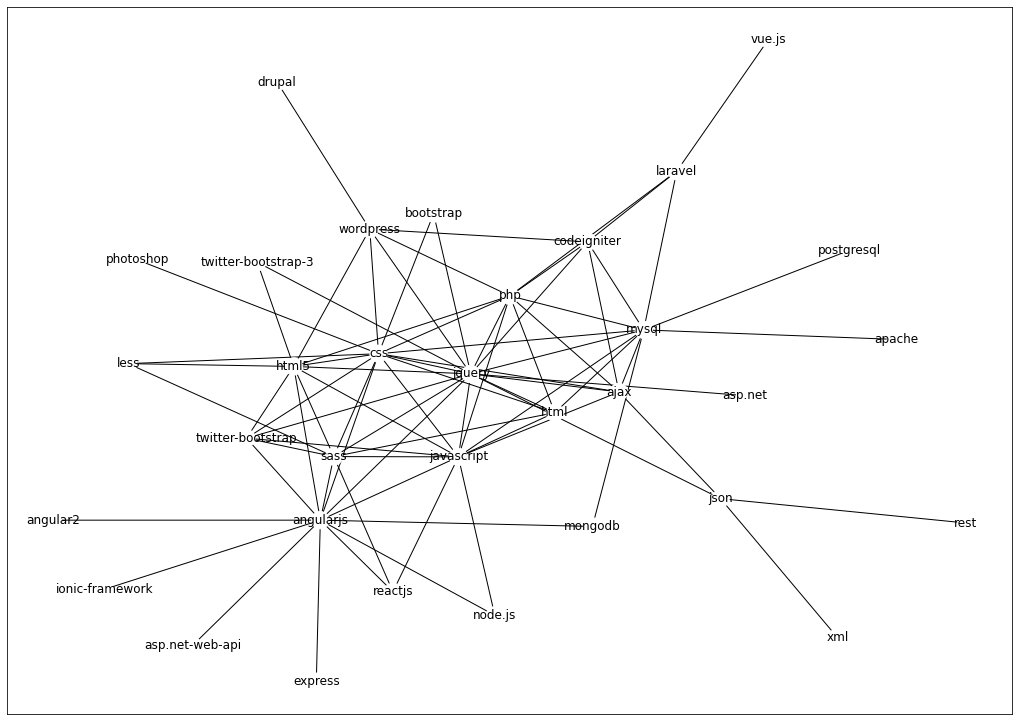

In [9]:
plt.figure(figsize=(18,13))
G = GraphVisualization(data)
G.visualize()

## Graph Class

In [10]:
class Graph:
    def __init__(self, graph_dict=None, directed=True):
        self.graph_dict = graph_dict or {}
        self.directed = directed
        
    def get(self, a, b=None):
        links = self.graph_dict.setdefault(a, {})
        if b is None:
            return links
        else:
            return links.get(b)

## Problem Class

In [11]:
class Problem(object):
    def __init__(self, initial, goal=None):
       self.initial = initial
       self.goal = goal
 
    def actions(self, state):
         raise NotImplementedError
 
    def result(self, state, action):
        raise NotImplementedError
 
    def goal_test(self, state):
            return state == self.goal
 
    def path_cost(self, c, state1, action, state2):
        return c + 1
 
    def value(self, state):
        raise NotImplementedError

## Graph Problem Class

In [12]:
infinity = float('inf')

class GraphProblem(Problem):
    def __init__(self, initial, goal, graph):
        Problem.__init__(self, initial, goal)
        self.graph = graph

    def actions(self, A):
        return self.graph.get(A)
    
    def result(self, state, action):
        return action

    def path_cost(self, cost_so_far, A, action, B):
        return cost_so_far + (self.graph.get(A, B) or infinity)

## Node Class

In [13]:
class Node:
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1
            
    def __repr__(self):
        return "<Node {}>".format(self.state)
    
    def expand(self, problem):
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]
    
    def child_node(self, problem, action):
        next_state = problem.result(self.state, action)
        new_cost = problem.path_cost(self.path_cost, self.state,action, next_state)        
        next_node = Node(next_state, self, action, new_cost )   
        return next_node
    
    def path(self):
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))
    
    def solution(self):        
        return [node.state for node in self.path()]

## Deep Limited Seacrh

In [14]:
def recursive_dls(node, problem, limit, visited=[]):
    if problem.goal_test(node.state):
        return node
    elif limit == 0:
        return 'cutoff'
    else:
        cutoff_occurred = False
        visited.append(node.state)    
        for child in node.expand(problem):
            result = recursive_dls(child, problem, limit - 1, visited)
            if result == 'cutoff':
                cutoff_occurred = True
            elif result is not None:
                return result
        return 'cutoff' if cutoff_occurred else 'Not found'

In [15]:
def depth_limited_search(problem, limit=50):
    return recursive_dls(Node(problem.initial), problem, limit, []) 

## Iterative Deepening Search

In [16]:
def iterative_deepening_search(problem, limit):
    for depth in range(0,limit):
        print("checking with depth :", depth)
        result = depth_limited_search(problem, depth)
        if not isinstance(result, str) :
            print('result : Found')
            return result
        print("result : ", result)
    print('\n Not Found')

## Inisialisasi Graph

In [17]:
df = Graph(data)
df

## Contoh Implementasi

In [18]:
problem = GraphProblem('vue.js','express', df)
hasil = iterative_deepening_search(problem, 10)
hasil

checking with depth : 0
result :  cutoff
checking with depth : 1
result :  cutoff
checking with depth : 2
result :  cutoff
checking with depth : 3
result :  cutoff
checking with depth : 4
result :  Not found
checking with depth : 5
result : Found


<Node express>

In [19]:
hasil.solution()

['vue.js', 'laravel', 'codeigniter', 'jquery', 'angularjs', 'express']

In [20]:
print('result :', hasil.path_cost)

result : 858.1


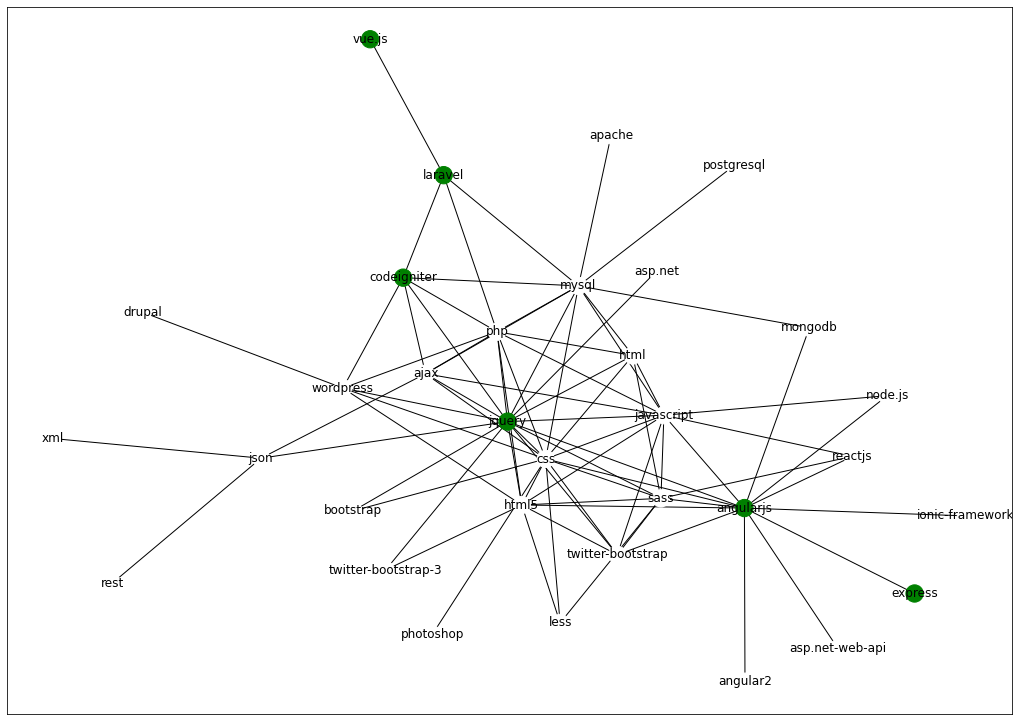

In [21]:
plt.figure(figsize=(18,13))
G = GraphVisualization(data, solution=hasil.solution())
G.visualize()